# 시각화 한글 지원을 위한 코드블럭

In [1]:
# 환경에 맞게 변수값 조정해주세요.
# 한글폰트 다운로드
# if u need .'sudo apt-get install fonts-nanum*'
# !apt-get install -y fonts-nanum
# !fc-cache -fv

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
print(font_list)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시 마이너스 표기

['NanumGothic Eco', 'NanumMyeongjo', 'NanumSquare', 'NanumMyeongjo', 'NanumSquareRound', 'NanumGothicCoding', 'Nanum Pen Script', 'NanumGothic Eco', 'NanumGothicCoding', 'NanumSquare_ac', 'NanumSquareRound', 'NanumGothic', 'NanumBarunpen', 'Nanum Brush Script', 'NanumMyeongjo Eco', 'NanumBarunGothic', 'NanumBarunGothic', 'NanumMyeongjo', 'NanumGothic', 'NanumBarunGothic', 'NanumGothic Eco', 'NanumSquare', 'NanumGothic', 'NanumSquareRound', 'NanumSquare', 'NanumGothic', 'NanumSquareRound', 'NanumMyeongjo YetHangul', 'NanumBarunGothic', 'NanumSquare', 'NanumBarunGothic YetHangul', 'NanumSquare_ac', 'NanumBarunpen', 'NanumMyeongjo Eco', 'NanumMyeongjo Eco', 'NanumSquare_ac', 'NanumSquare_ac', 'NanumGothic Eco', 'NanumMyeongjo Eco']


# 인구 유출입 데이터 시각화

In [3]:
# 시각화를 위한 라이브러리 임포트
# csv 호출
# case폴더안에 있는 csv파일들을 호출
# 호출할때, 각 csv파일들을 해당 파일이름의 데이터프레임으로 저장

import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

input_dir = Path("case")
csv_files = list(input_dir.glob("*.csv"))
dataframes = {}

for csv_file in csv_files:
    df_name = csv_file.stem.replace(" ", "_").replace("-", "_").replace("(", "_").replace(")", "_")
    globals()[df_name] = pd.read_csv(csv_file, encoding='utf-8-sig')
    # df_name 이름대로 데이터프레임 생성
    print(f"Loaded {csv_file} into DataFrame '{df_name}'")
    dataframes[df_name] = globals()[df_name]

    


Loaded case/성산_용지_Lag_Processed.csv into DataFrame '성산_용지_Lag_Processed'
Loaded case/마산합포_교방_Lag_Processed.csv into DataFrame '마산합포_교방_Lag_Processed'
Loaded case/성산구_Lag_Processed.csv into DataFrame '성산구_Lag_Processed'
Loaded case/마산회원구_Lag_Processed.csv into DataFrame '마산회원구_Lag_Processed'
Loaded case/의창구_Lag_Processed.csv into DataFrame '의창구_Lag_Processed'
Loaded case/마산합포_오동동_Lag_Processed.csv into DataFrame '마산합포_오동동_Lag_Processed'
Loaded case/합포_반월_Lag_Processed.csv into DataFrame '합포_반월_Lag_Processed'
Loaded case/마산합포구_Lag_Processed.csv into DataFrame '마산합포구_Lag_Processed'
Loaded case/진해구_Lag_Processed.csv into DataFrame '진해구_Lag_Processed'
Loaded case/마산회원_석전동_Lag_Processed.csv into DataFrame '마산회원_석전동_Lag_Processed'
Loaded case/진해구_충무동_Lag_Processed.csv into DataFrame '진해구_충무동_Lag_Processed'


In [4]:
# 특수 case 리스트
special_case_list = [성산_용지_Lag_Processed, 마산합포_교방_Lag_Processed, 마산합포_오동동_Lag_Processed, 마산회원_석전동_Lag_Processed, 마산회원_석전동_Lag_Processed, 진해구_충무동_Lag_Processed, 합포_반월_Lag_Processed]


# 의창구 데이터프레임에서 행정동 값 '동읍', '북면', '대산면', '의창동', '팔룡동', '명곡동', '봉림동' 각각에 대하여 각각의 이름을 가진 데이터프레임을 개별 생성.
uichang_df = dataframes["의창구_Lag_Processed"]
uichang_dong_list = ['동읍', '북면', '대산면', '의창동', '팔룡동', '명곡동', '봉림동']
동읍_df, 북면_df, 대산면_df, 의창동_df, 팔룡동_df, 명곡동_df, 봉림동_df = [uichang_df[uichang_df['행정동'] == dong].copy() for dong in uichang_dong_list]
df_list_의창구 = [동읍_df, 북면_df, 대산면_df, 의창동_df, 팔룡동_df, 명곡동_df, 봉림동_df]


# 성산구 데이터프레임에서 행정동 값 '반송동', '상남동', '사파동', '가음정동', '성주동', '웅남동' 각각에 대하여 각각의 이름을 가진 데이터프레임을 개별 생성.
seongsan_df = dataframes["성산구_Lag_Processed"]
seongsan_dong_list = ['반송동', '상남동', '사파동', '가음정동', '성주동', '웅남동']
반송동_df, 상남동_df, 사파동_df, 가음정동_df, 성주동_df, 웅남동_df = [seongsan_df[seongsan_df['행정동'] == dong].copy() for dong in seongsan_dong_list]
df_list_성산구 = [반송동_df, 상남동_df, 사파동_df, 가음정동_df, 성주동_df, 웅남동_df]


# 마산합포구 데이터프레임에서 행정동 값 '구산면', '진동면', '진북면', '진전면', '현동', '가포동', '월영동', '문화동', '완월동', '자산동', '합포동', '산호동' 각각에 대하여 각각의 이름을 가진 데이터프레임을 개별 생성.
masanhappo_df = dataframes["마산합포구_Lag_Processed"]
masanhappo_dong_list = ['구산면', '진동면', '진북면', '진전면', '현동', '가포동', '월영동', '문화동', '완월동', '자산동', '합포동', '산호동']
구산면_df, 진동면_df, 진북면_df, 진전면_df, 현동_df, 가포동_df, 월영동_df, 문화동_df, 완월동_df, 자산동_df, 합포동_df, 산호동_df = [masanhappo_df[masanhappo_df['행정동'] == dong].copy() for dong in masanhappo_dong_list]
df_list_마산합포구 = [구산면_df, 진동면_df, 진북면_df, 진전면_df, 현동_df, 가포동_df, 월영동_df, 문화동_df, 완월동_df, 자산동_df, 합포동_df, 산호동_df]

# 마산회원구 데이터프레임에서 행정동 값 '내서읍', '회원1동', '회원2동', '회성동', '양덕1동', '양덕2동', '합성1동', '합성2동', '구암1동', '구암2동', '봉암동' 각각에 대하여 각각의 이름을 가진 데이터프레임을 개별 생성.
masanhwewon_df = dataframes["마산회원구_Lag_Processed"]
masanhwewon_dong_list = ['내서읍', '회원1동', '회원2동', '회성동', '양덕1동', '양덕2동', '합성1동', '합성2동', '구암1동', '구암2동', '봉암동']
내서읍_df, 회원1동_df, 회원2동_df, 회성동_df, 양덕1동_df, 양덕2동_df, 합성1동_df, 합성2동_df, 구암1동_df, 구암2동_df, 봉암동_df = [masanhwewon_df[masanhwewon_df['행정동'] == dong].copy() for dong in masanhwewon_dong_list]
df_list_마산회원구 = [내서읍_df, 회원1동_df, 회원2동_df, 회성동_df, 양덕1동_df, 양덕2동_df, 합성1동_df, 합성2동_df, 구암1동_df, 구암2동_df, 봉암동_df]

# 진해구 데이터프레임에서 행정동 값 '여좌동', '태백동', '경화동', '병암동', '석동', '이동', '자은동', '덕산동', '풍호동', '웅천동', '웅동1동', '웅동2동' 각각에 대하여 각각의 이름을 가진 데이터프레임을 개별 생성.
jinhae_df = dataframes["진해구_Lag_Processed"]
jinhae_dong_list = ['여좌동', '태백동', '경화동', '병암동', '석동', '이동', '자은동', '덕산동', '풍호동', '웅천동', '웅동1동', '웅동2동']
여좌동_df, 태백동_df, 경화동_df, 병암동_df, 석동_df, 이동_df, 자은동_df, 덕산동_df, 풍호동_df, 웅천동_df, 웅동1동_df, 웅동2동_df = [jinhae_df[jinhae_df['행정동'] == dong].copy() for dong in jinhae_dong_list]
df_list_진해구 = [여좌동_df, 태백동_df, 경화동_df, 병암동_df, 석동_df, 이동_df, 자은동_df, 덕산동_df, 풍호동_df, 웅천동_df, 웅동1동_df, 웅동2동_df]


# df_list들을 하나의 리스트로 통합
df_population_list = df_list_의창구 + df_list_성산구 + df_list_마산합포구 + df_list_마산회원구 + df_list_진해구 + special_case_list

# (필요시) 각 구 데이터프레임을 case폴더안에 각각 '의창구_Lag_Processed.csv', '성산구_Lag_Processed.csv', '마산합포구_Lag_Processed.csv', '마산회원구_Lag_Processed.csv', '진해구_Lag_Processed.csv' 이름으로 저장.
# for name, df in [("의창구", uichang_df), ("성산구", seongsan_df),
#                 ("마산합포구", masanhappo_df), ("마산회원구", masanhwewon_df),
#                 ("진해구", jinhae_df)]:
#     output_file = output_dir / f"{name}_Lag_Processed.csv"
#     df.to_csv(output_file, index=False, encoding='utf-8-sig')
#     print(f"Saved {output_file}")

In [5]:
# df_population_list를 다른 쥬피터노트북에서 사용하기 위해 저장
import pickle
with open('df_population_list.pkl', 'wb') as f:
    pickle.dump(df_population_list, f)

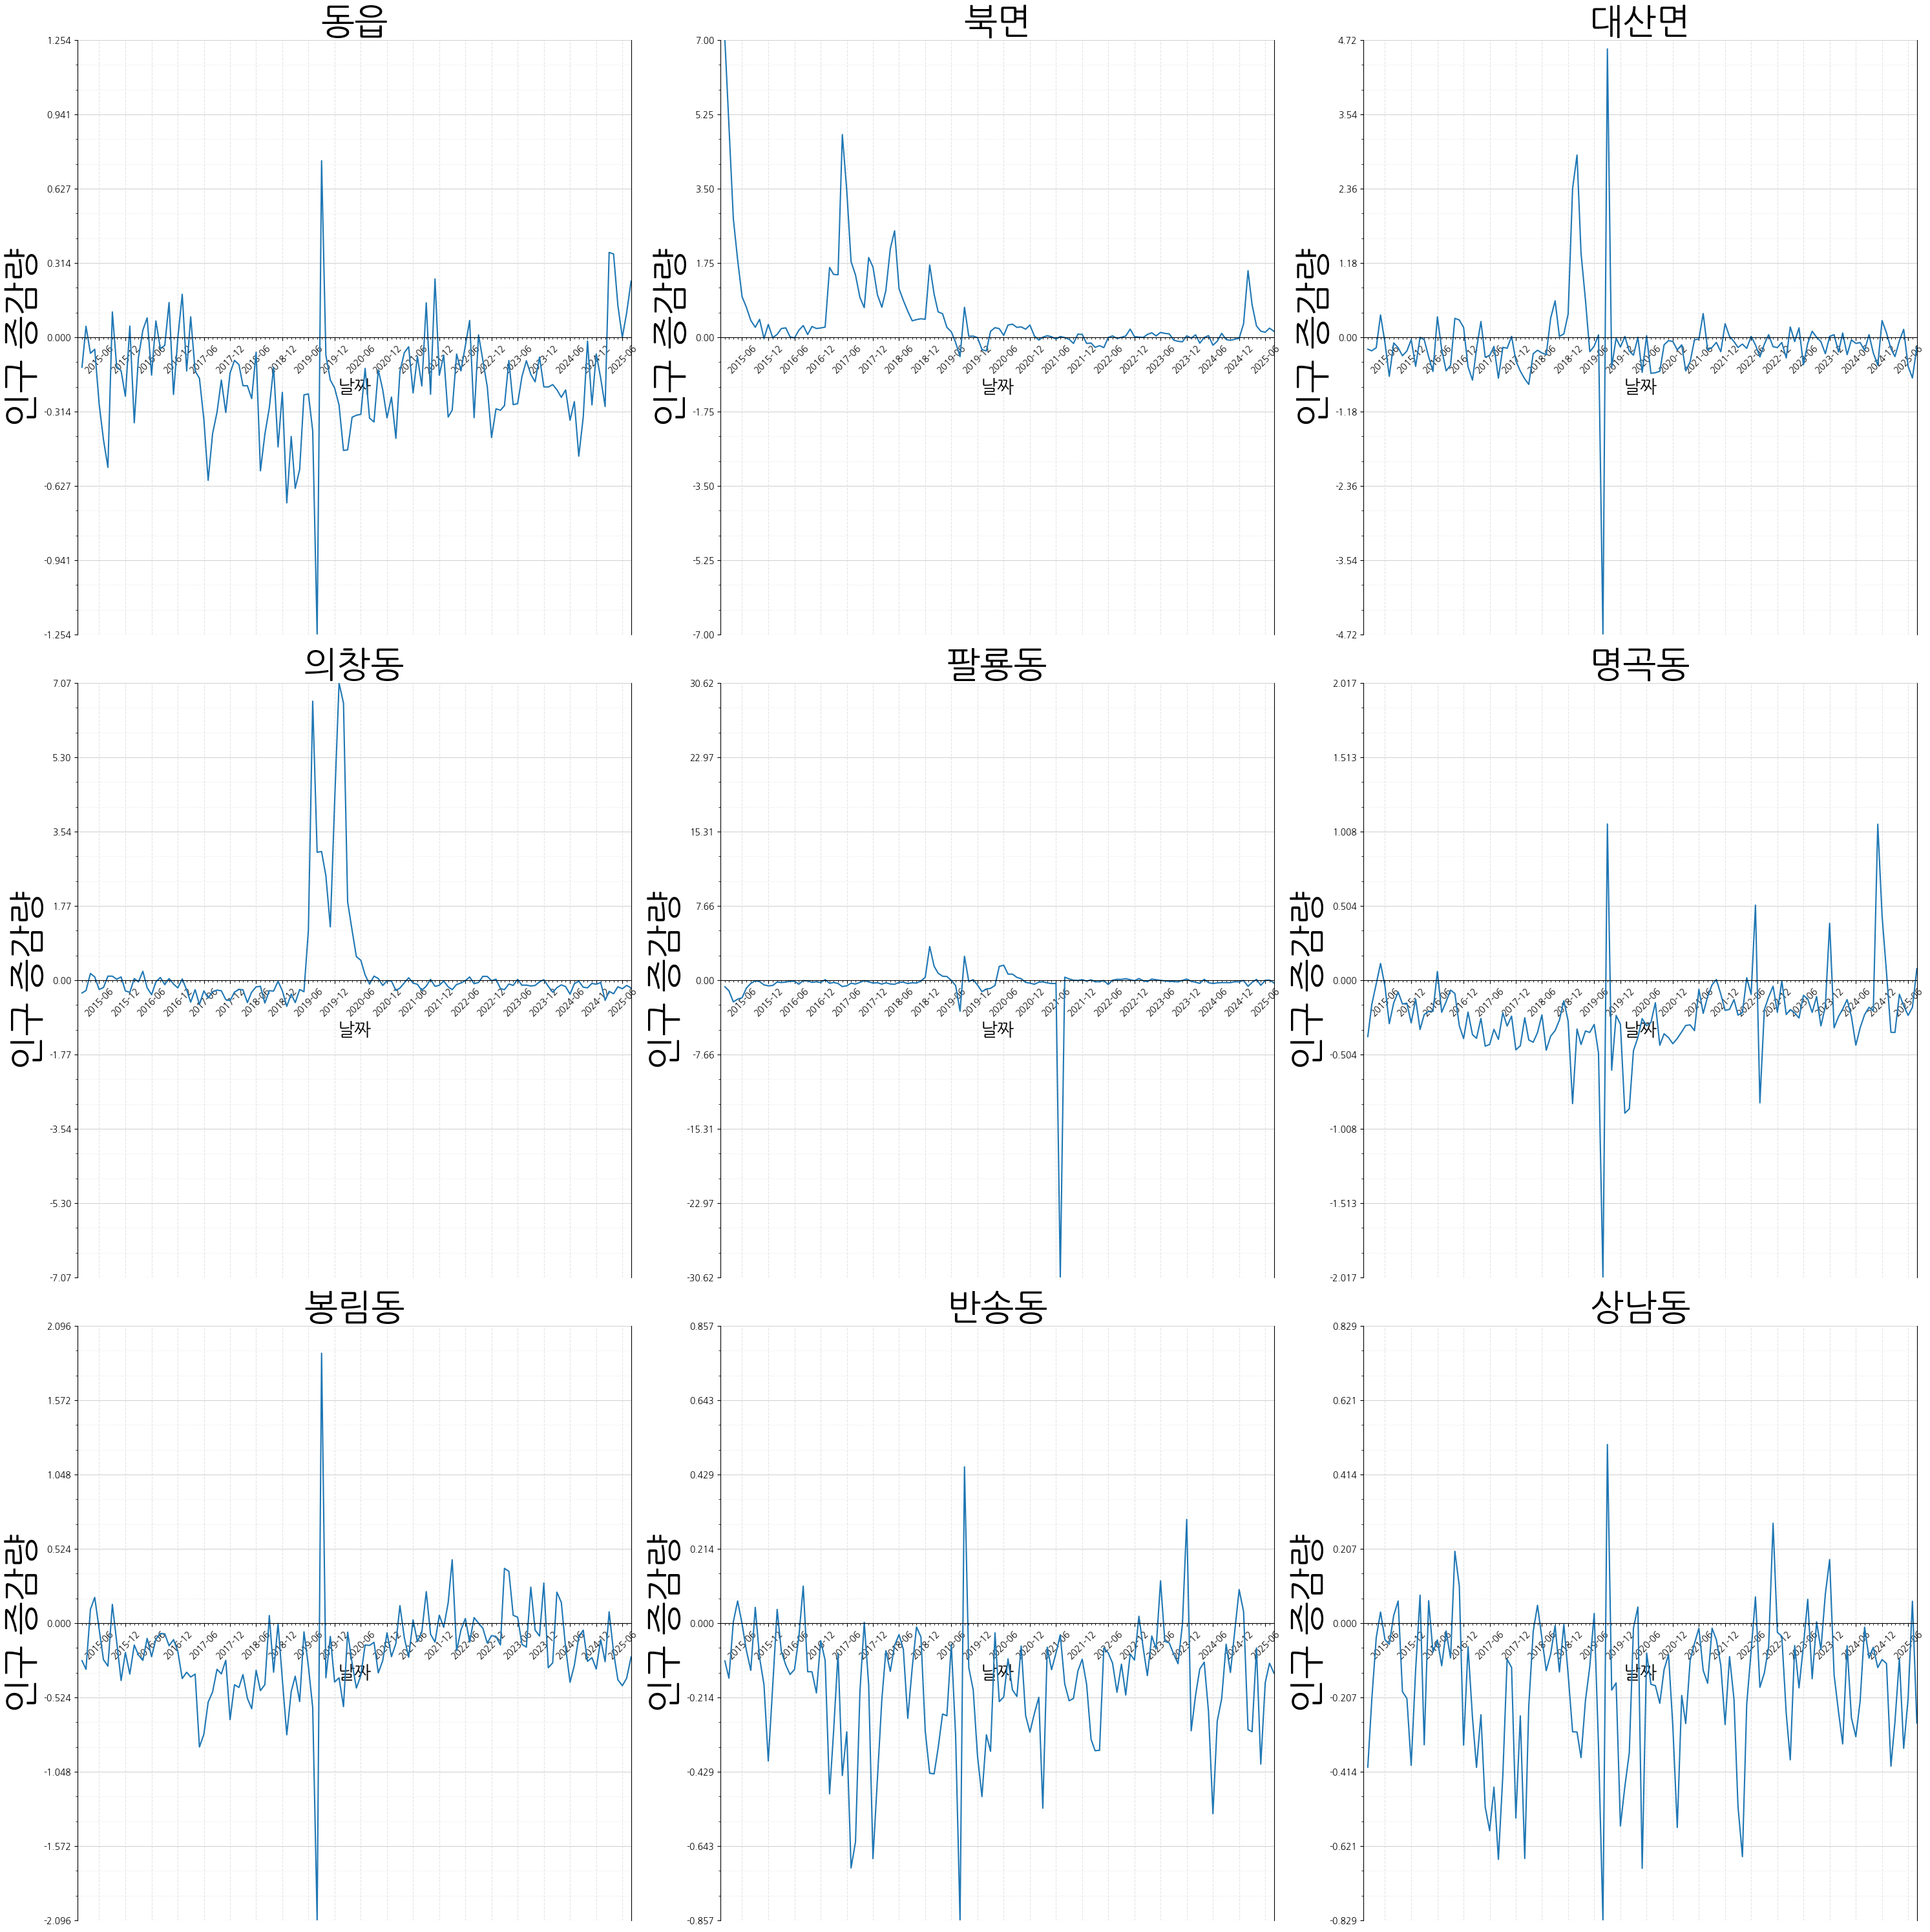

Saved 0.png


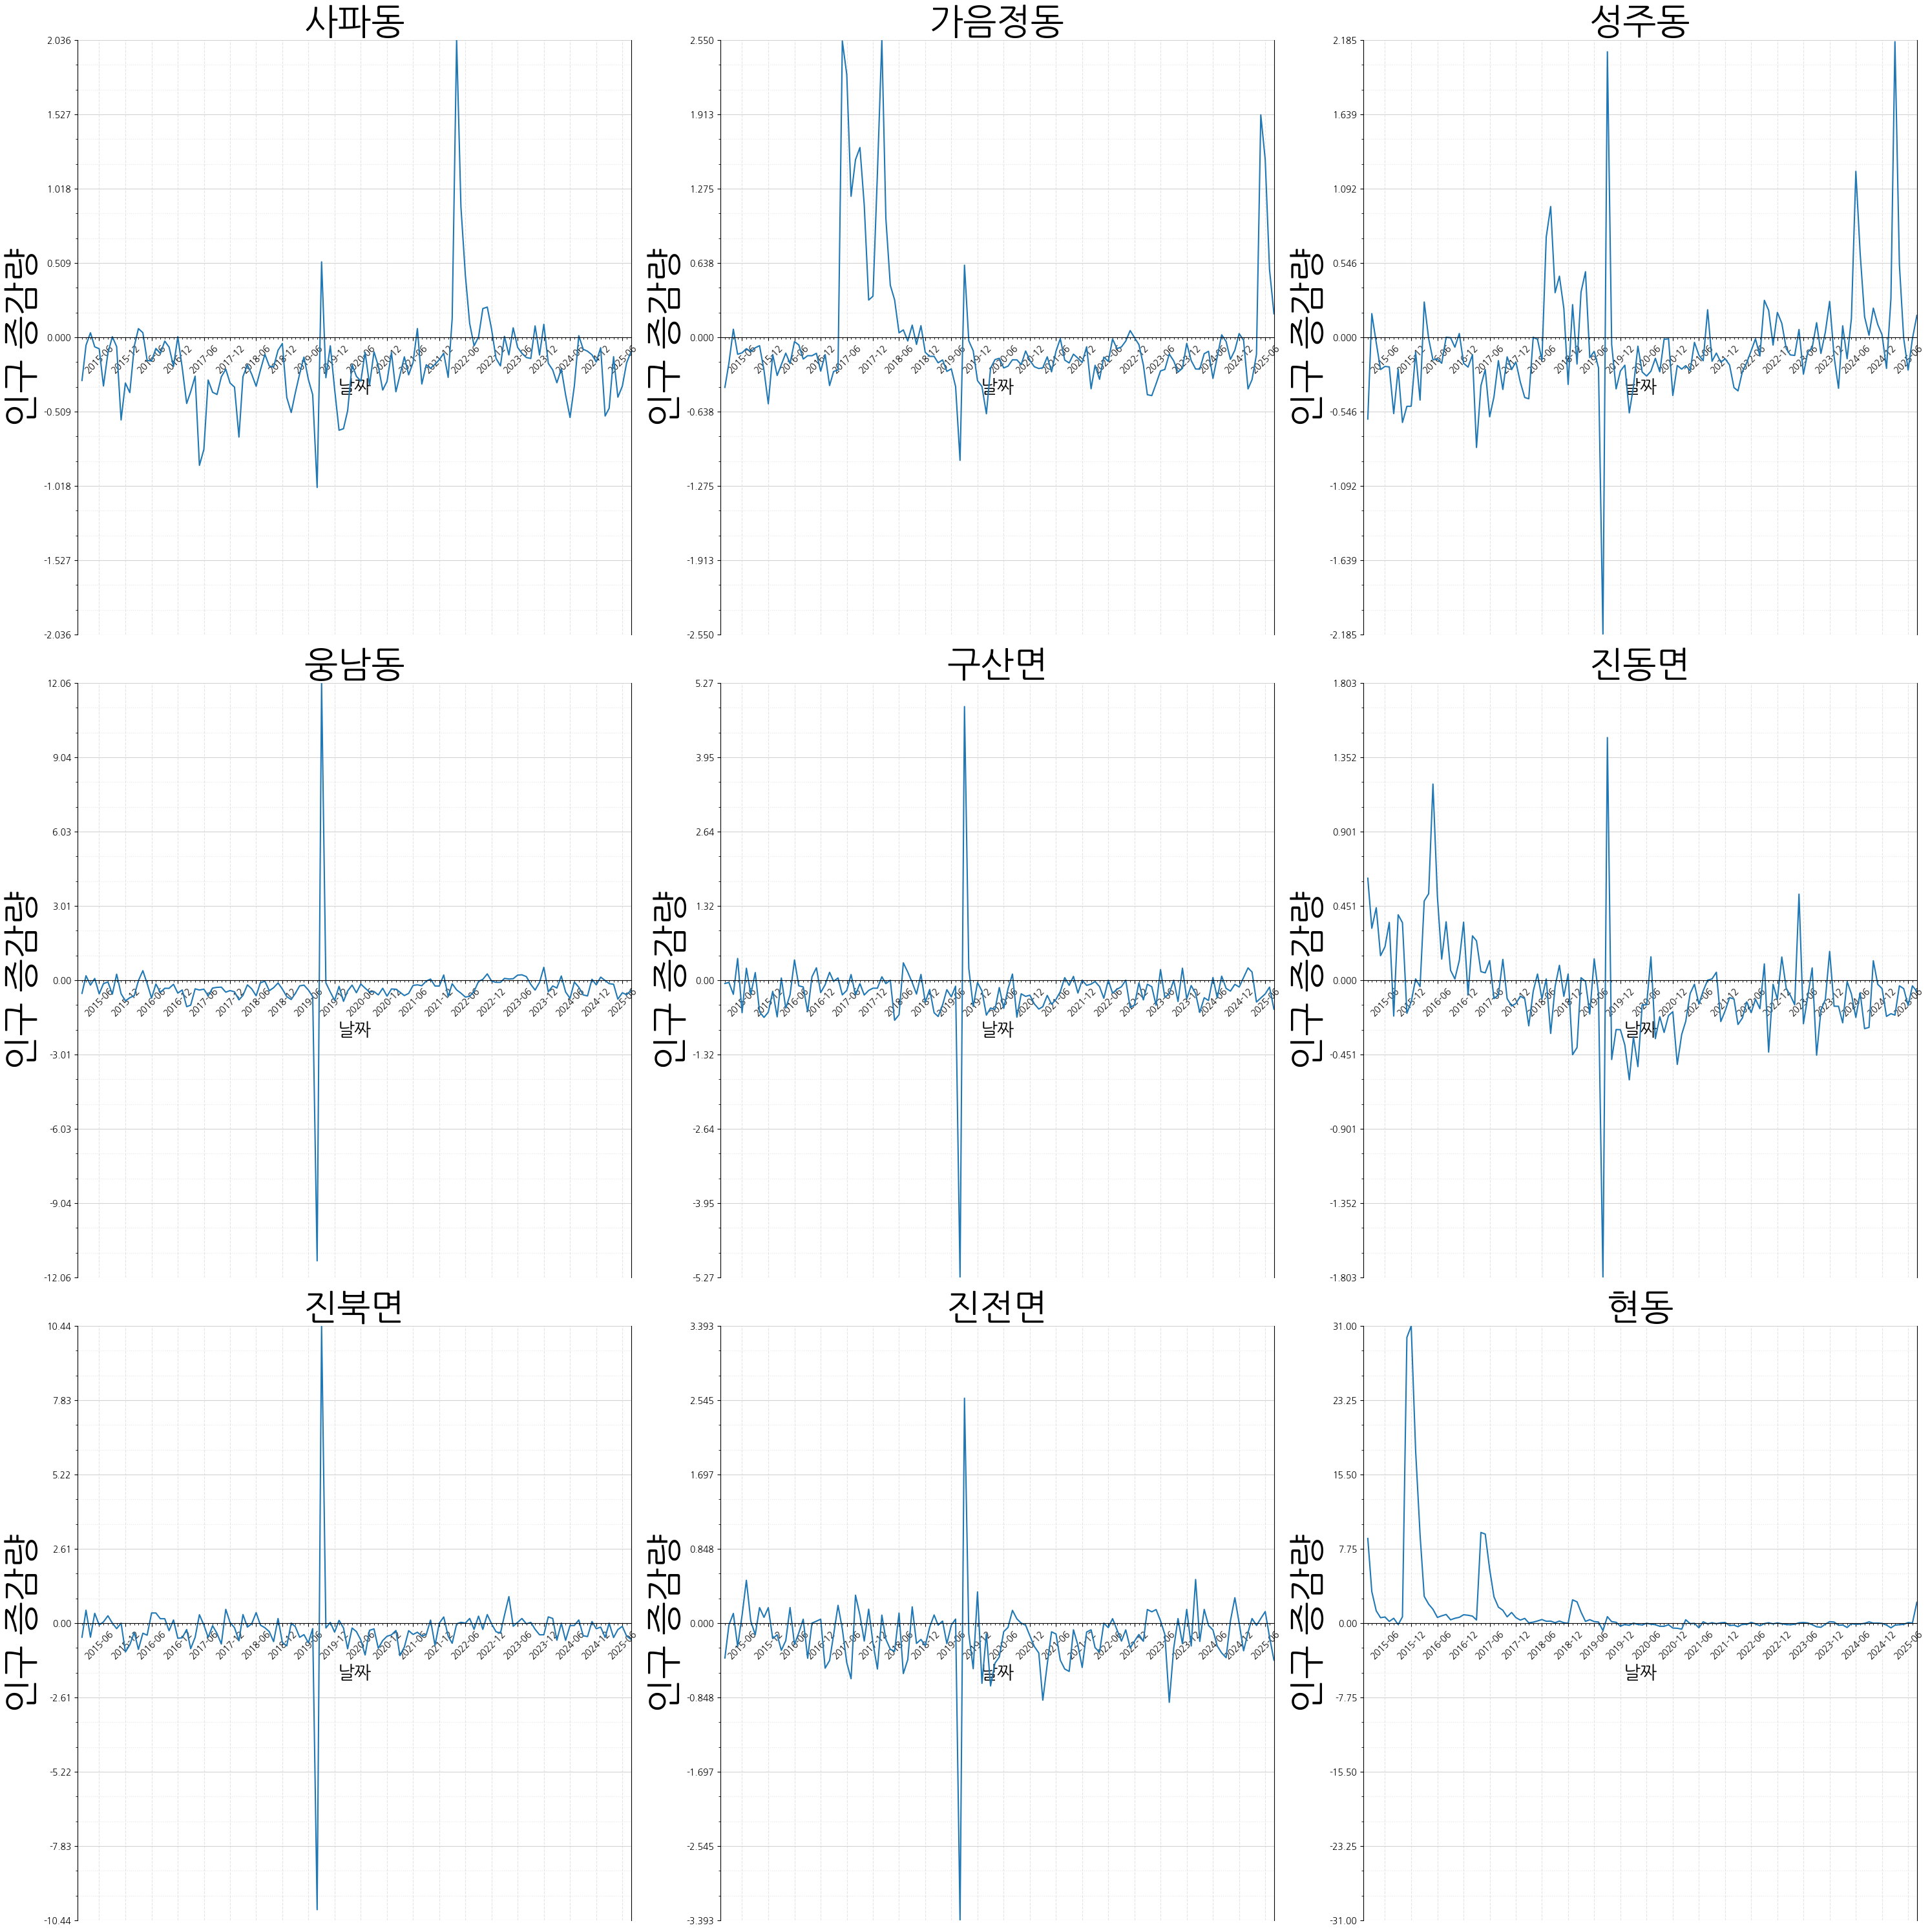

Saved 1.png


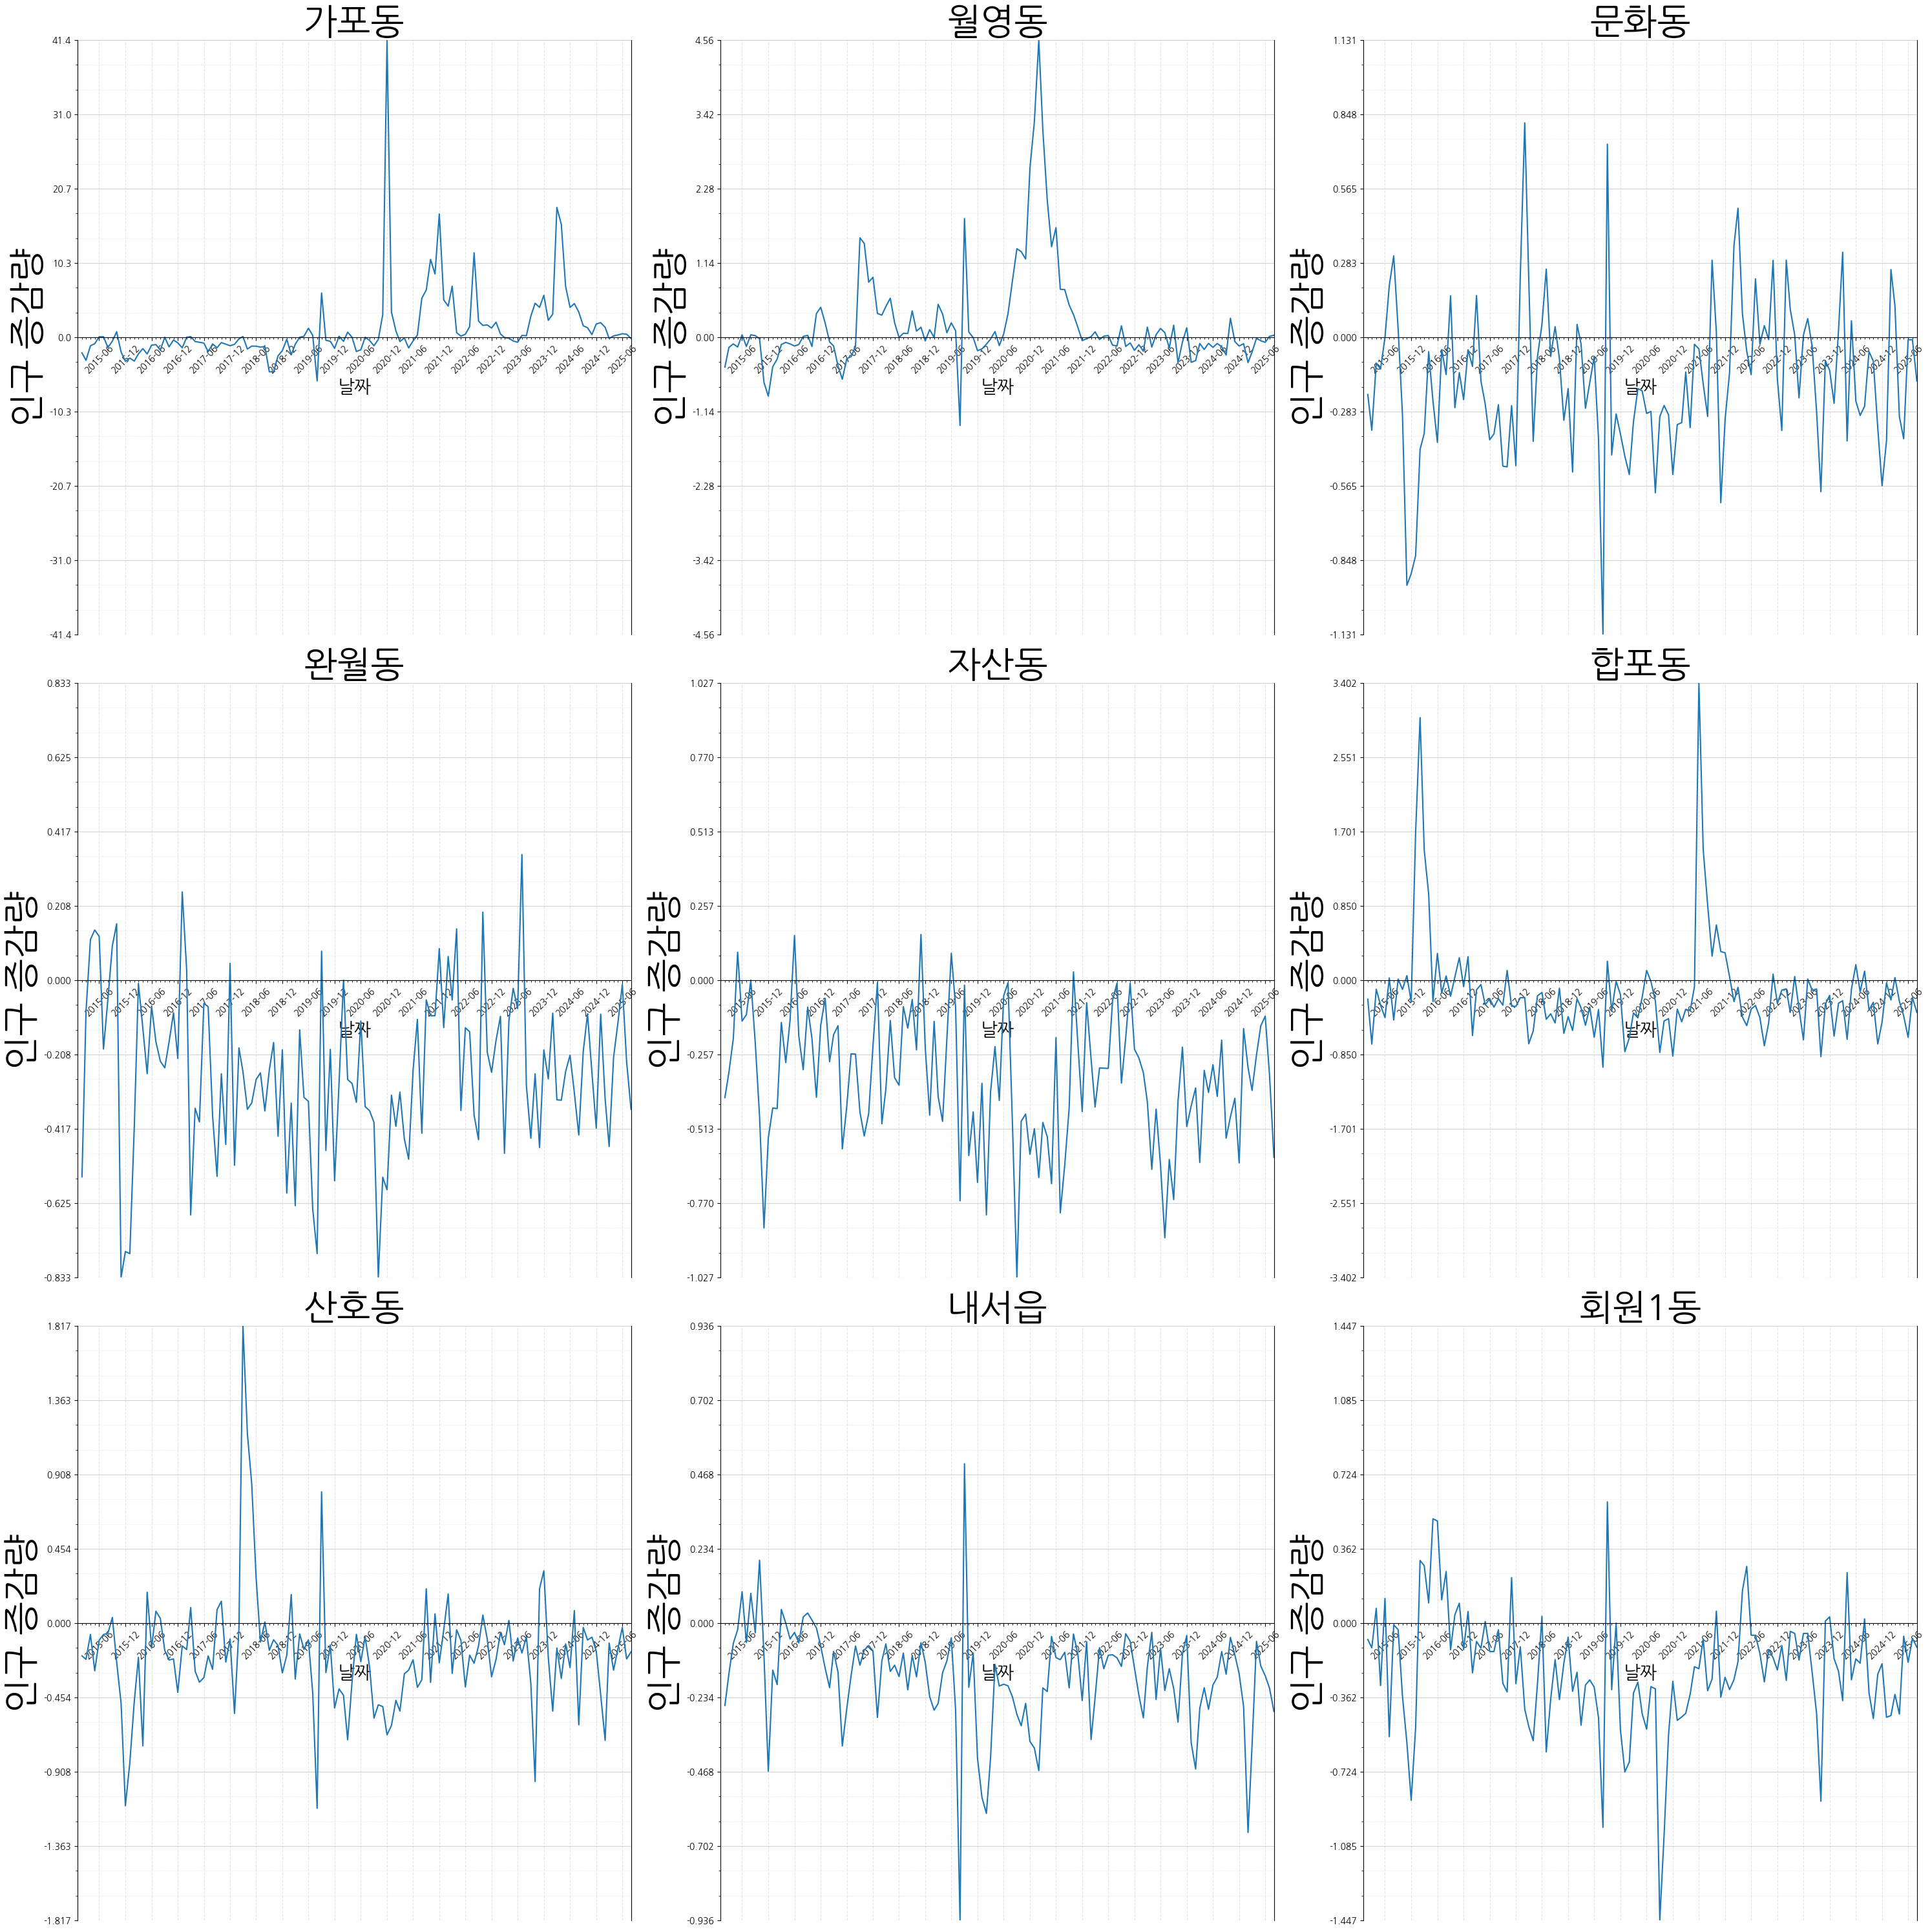

Saved 2.png


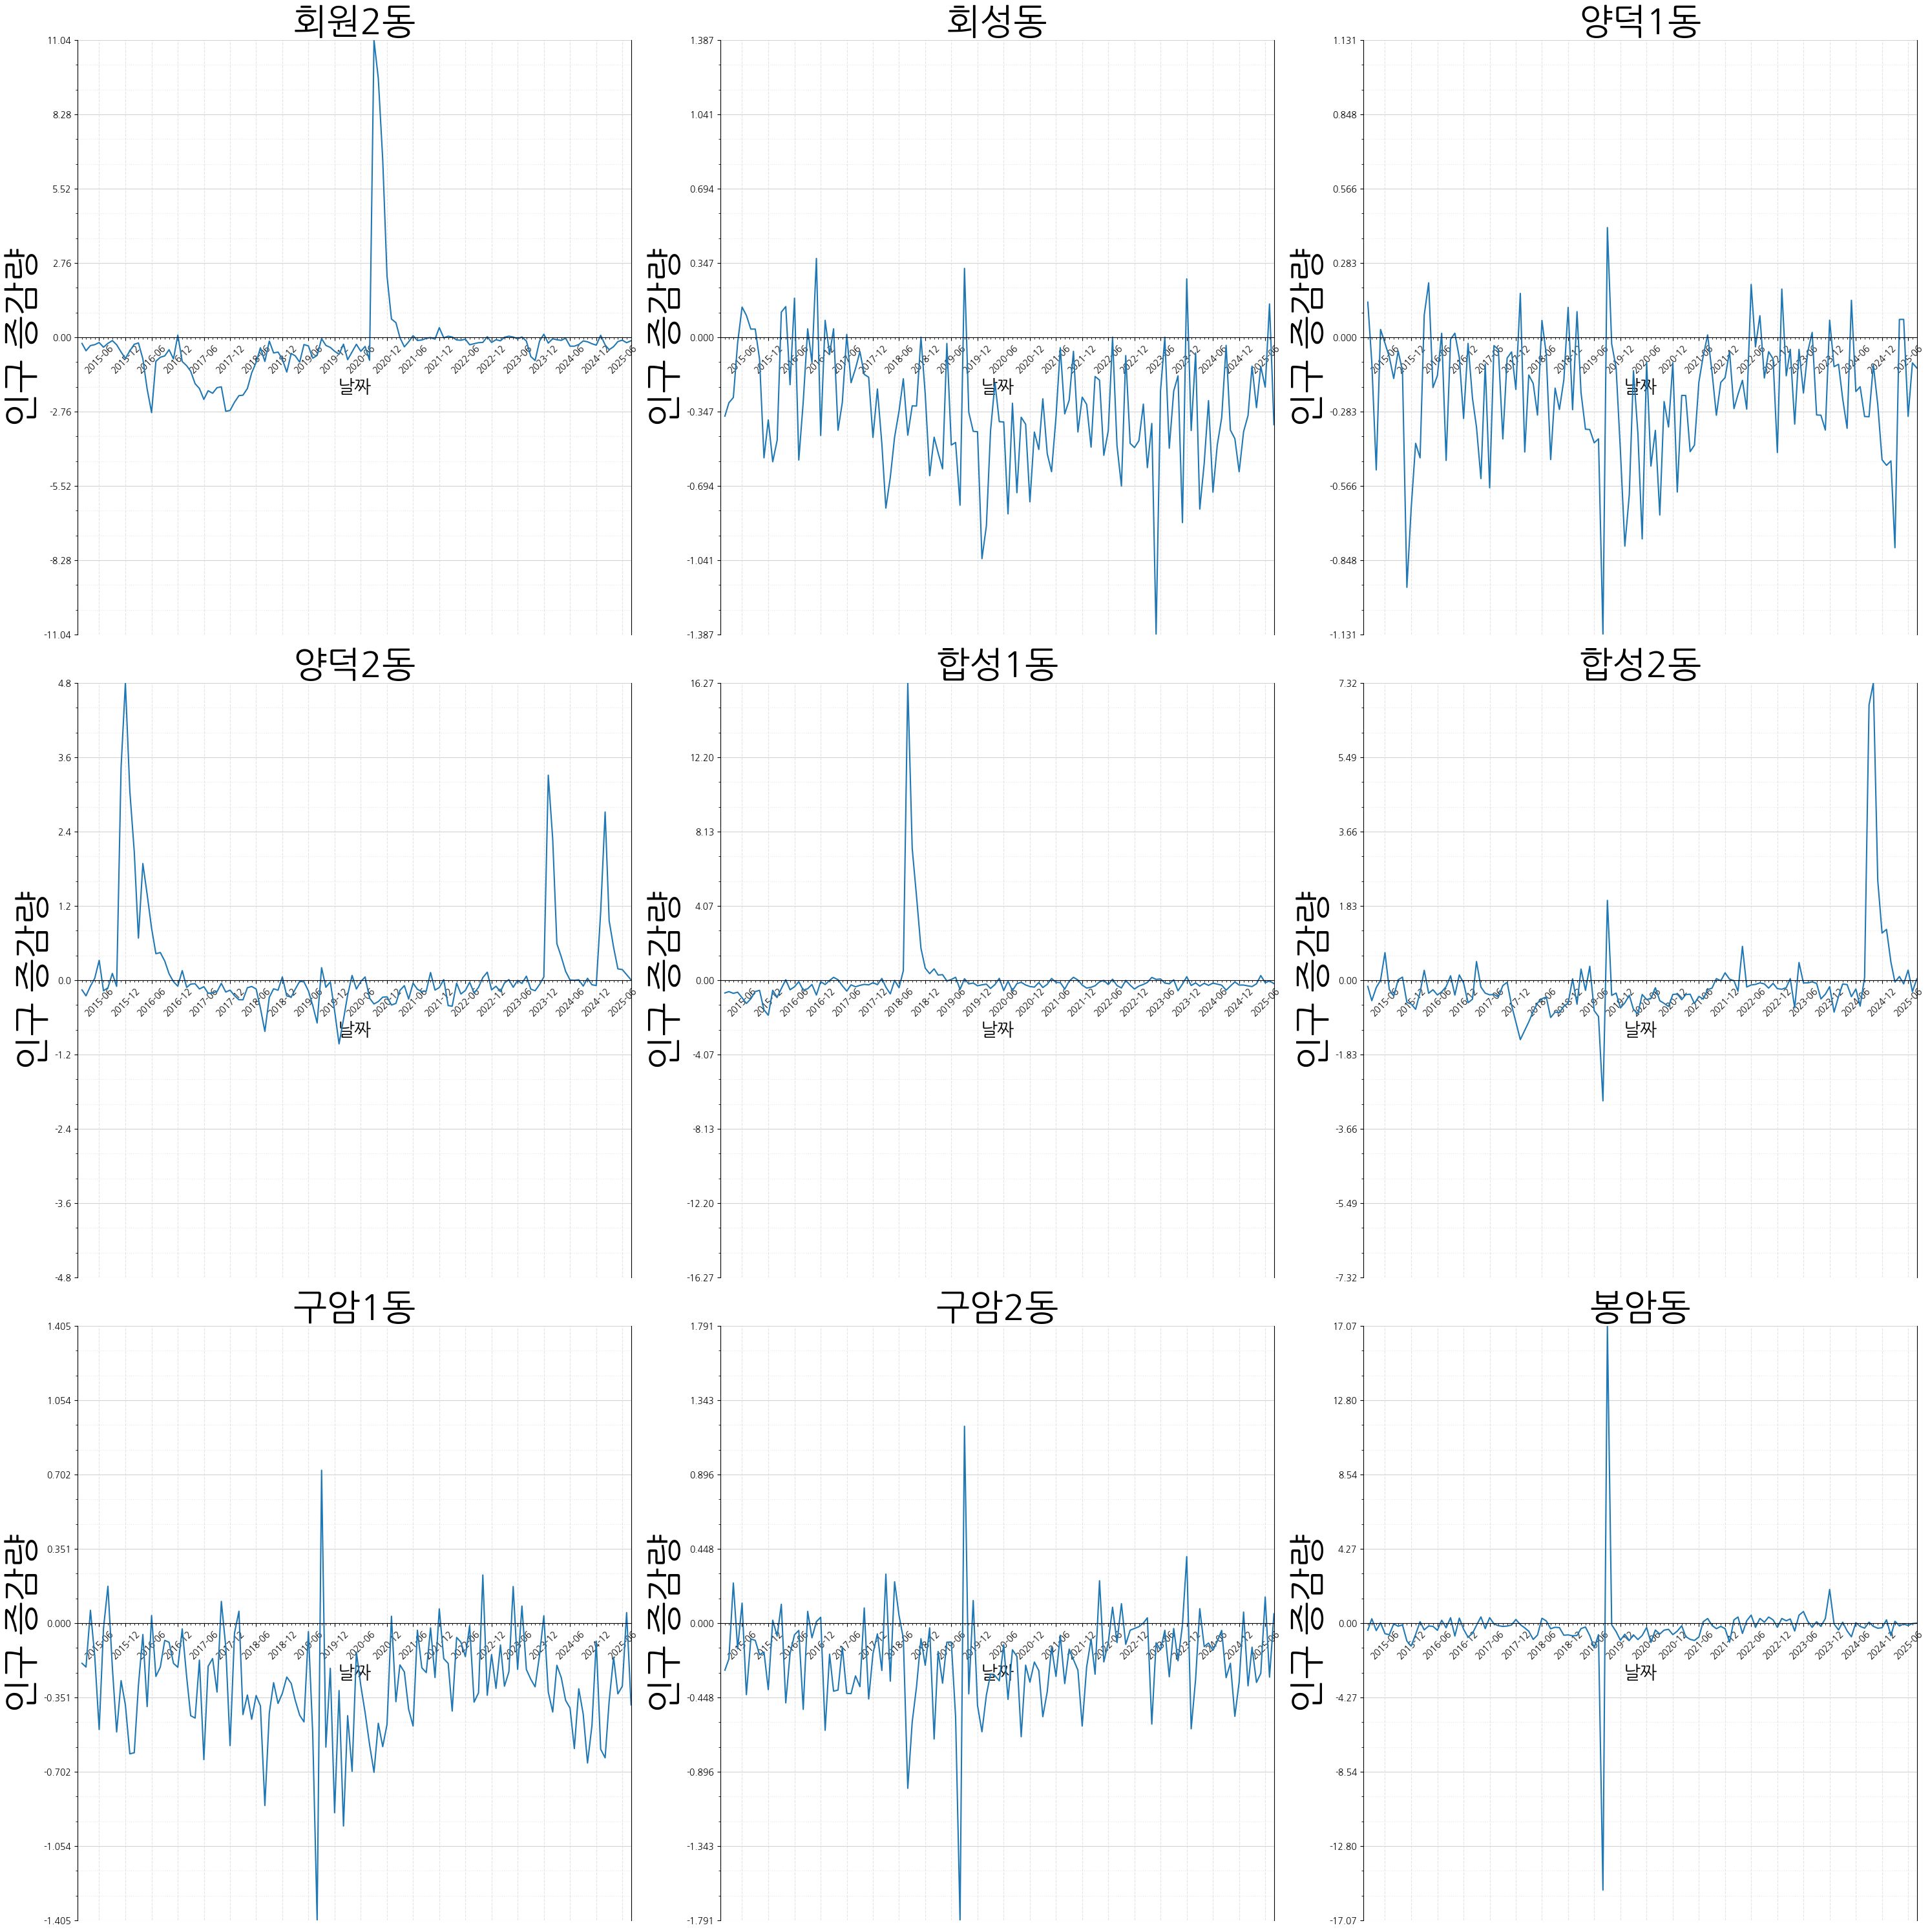

Saved 3.png


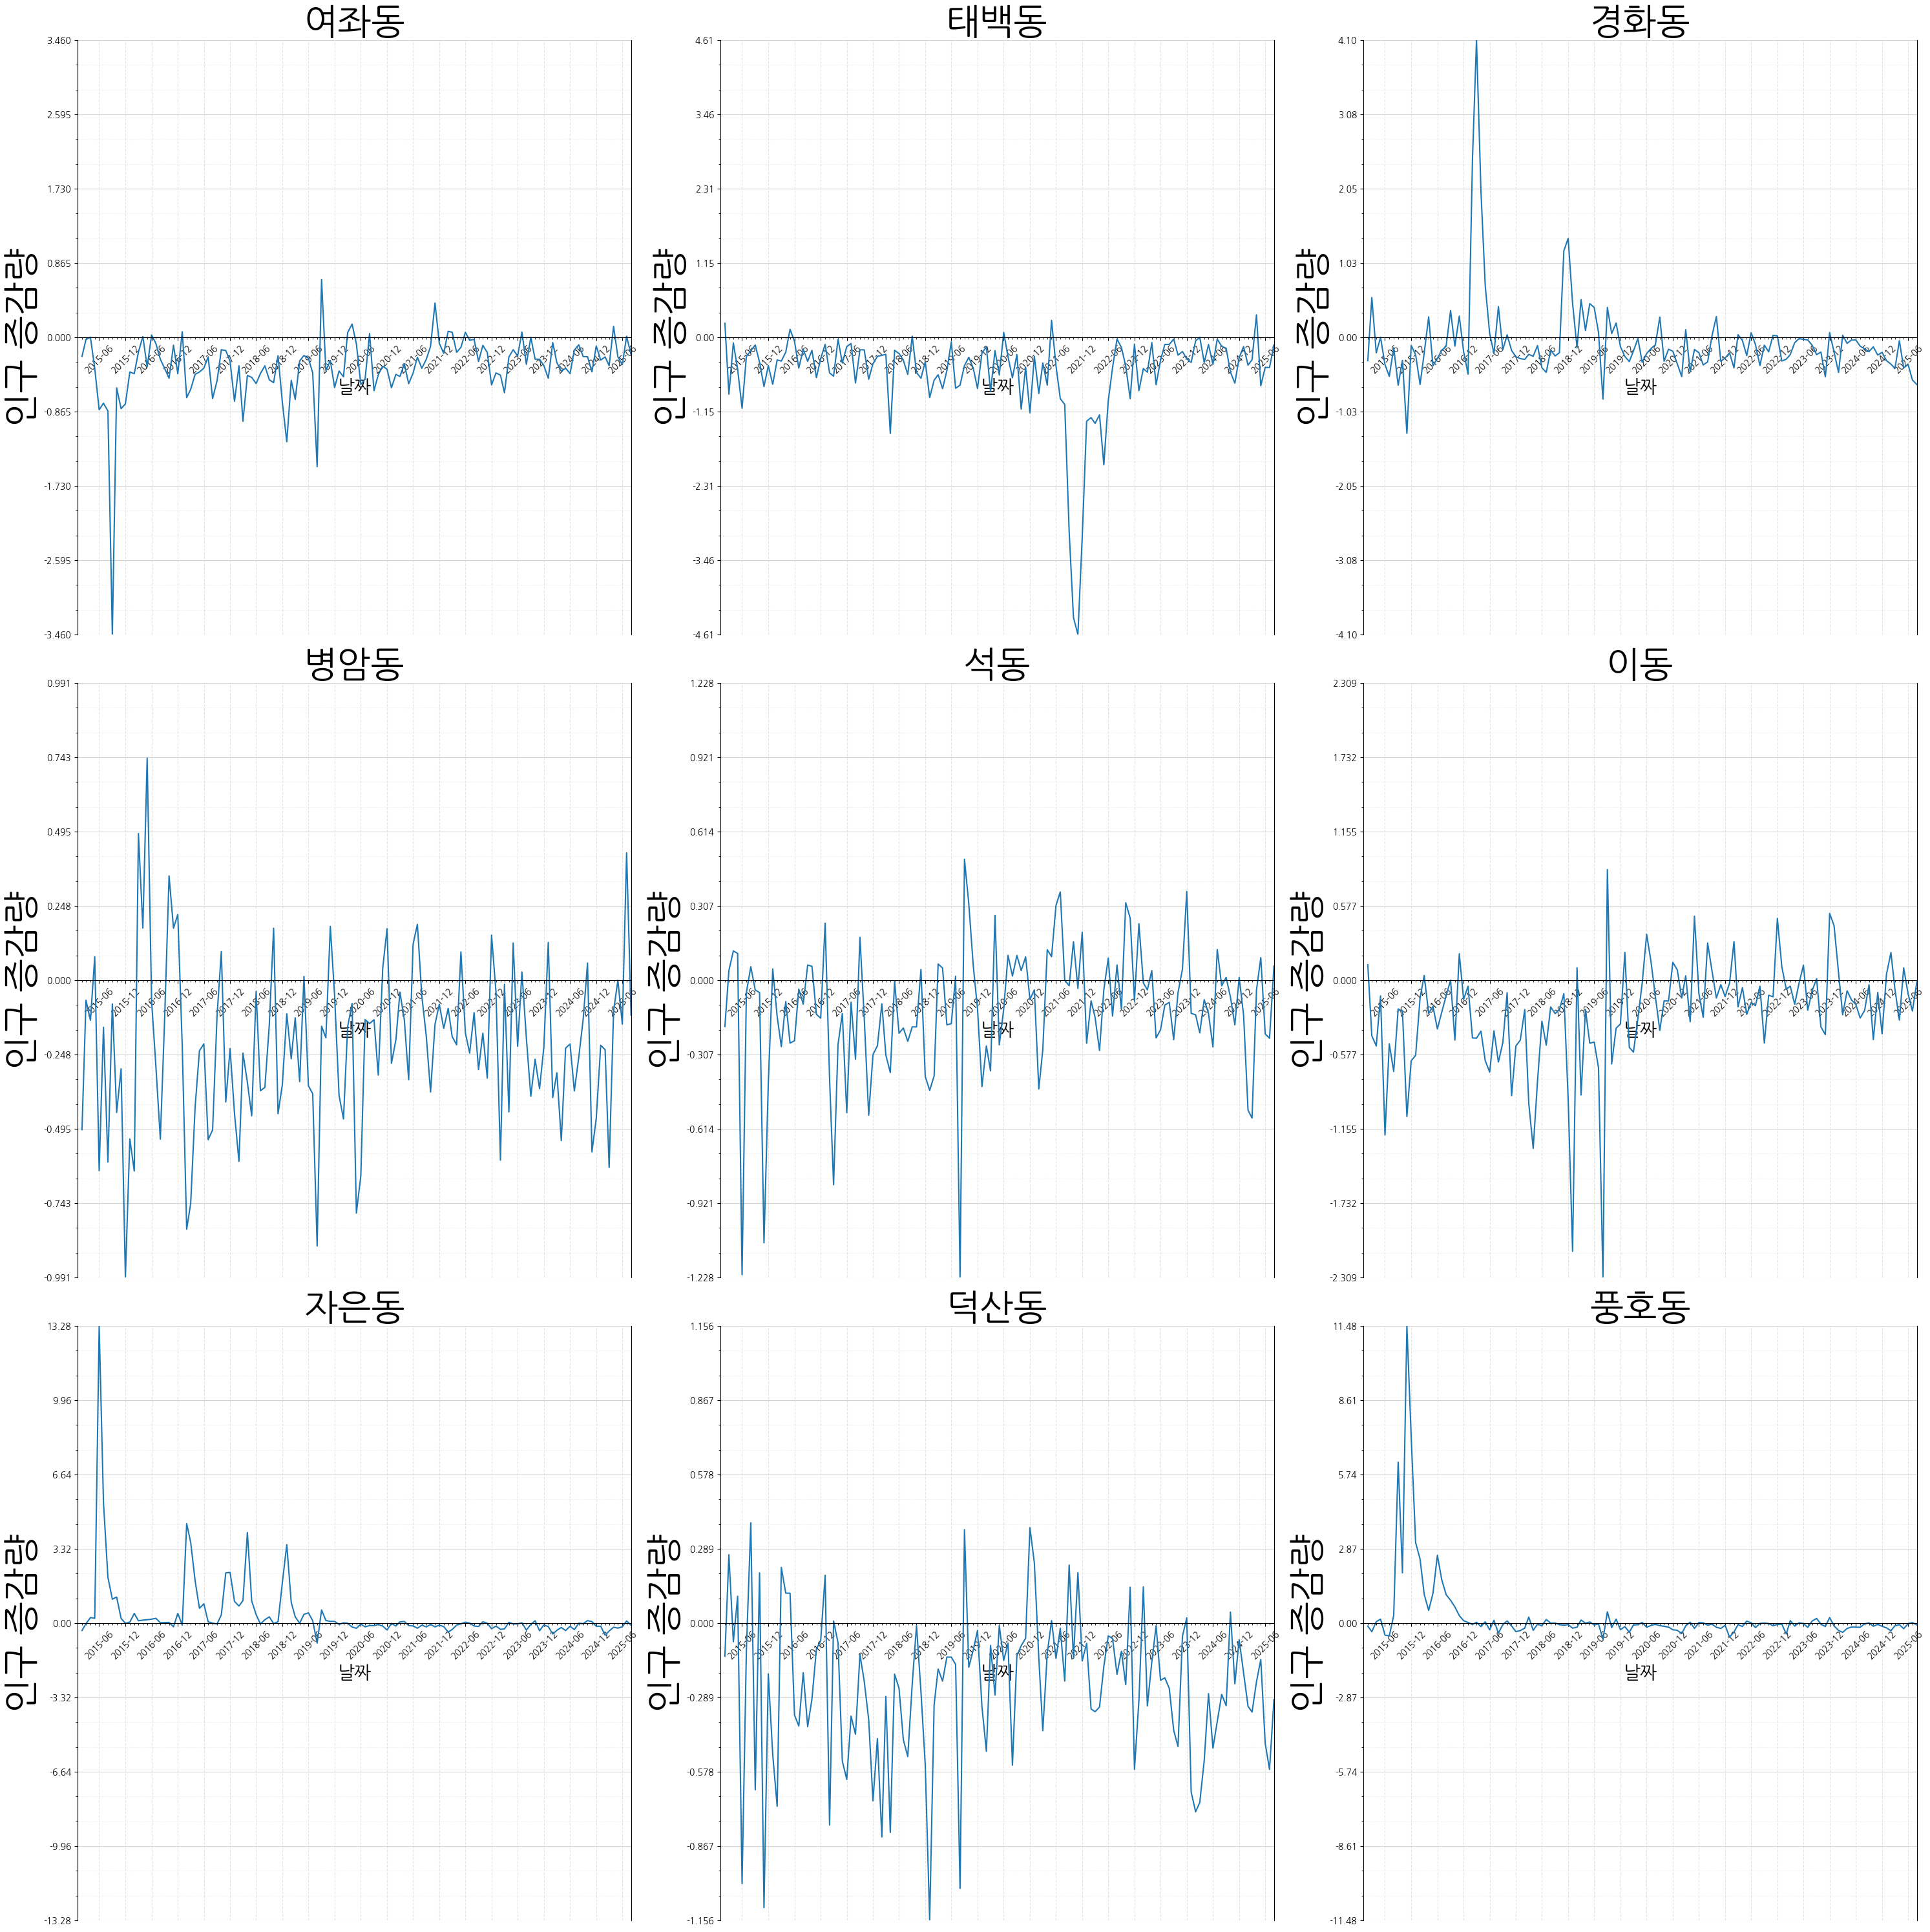

Saved 4.png


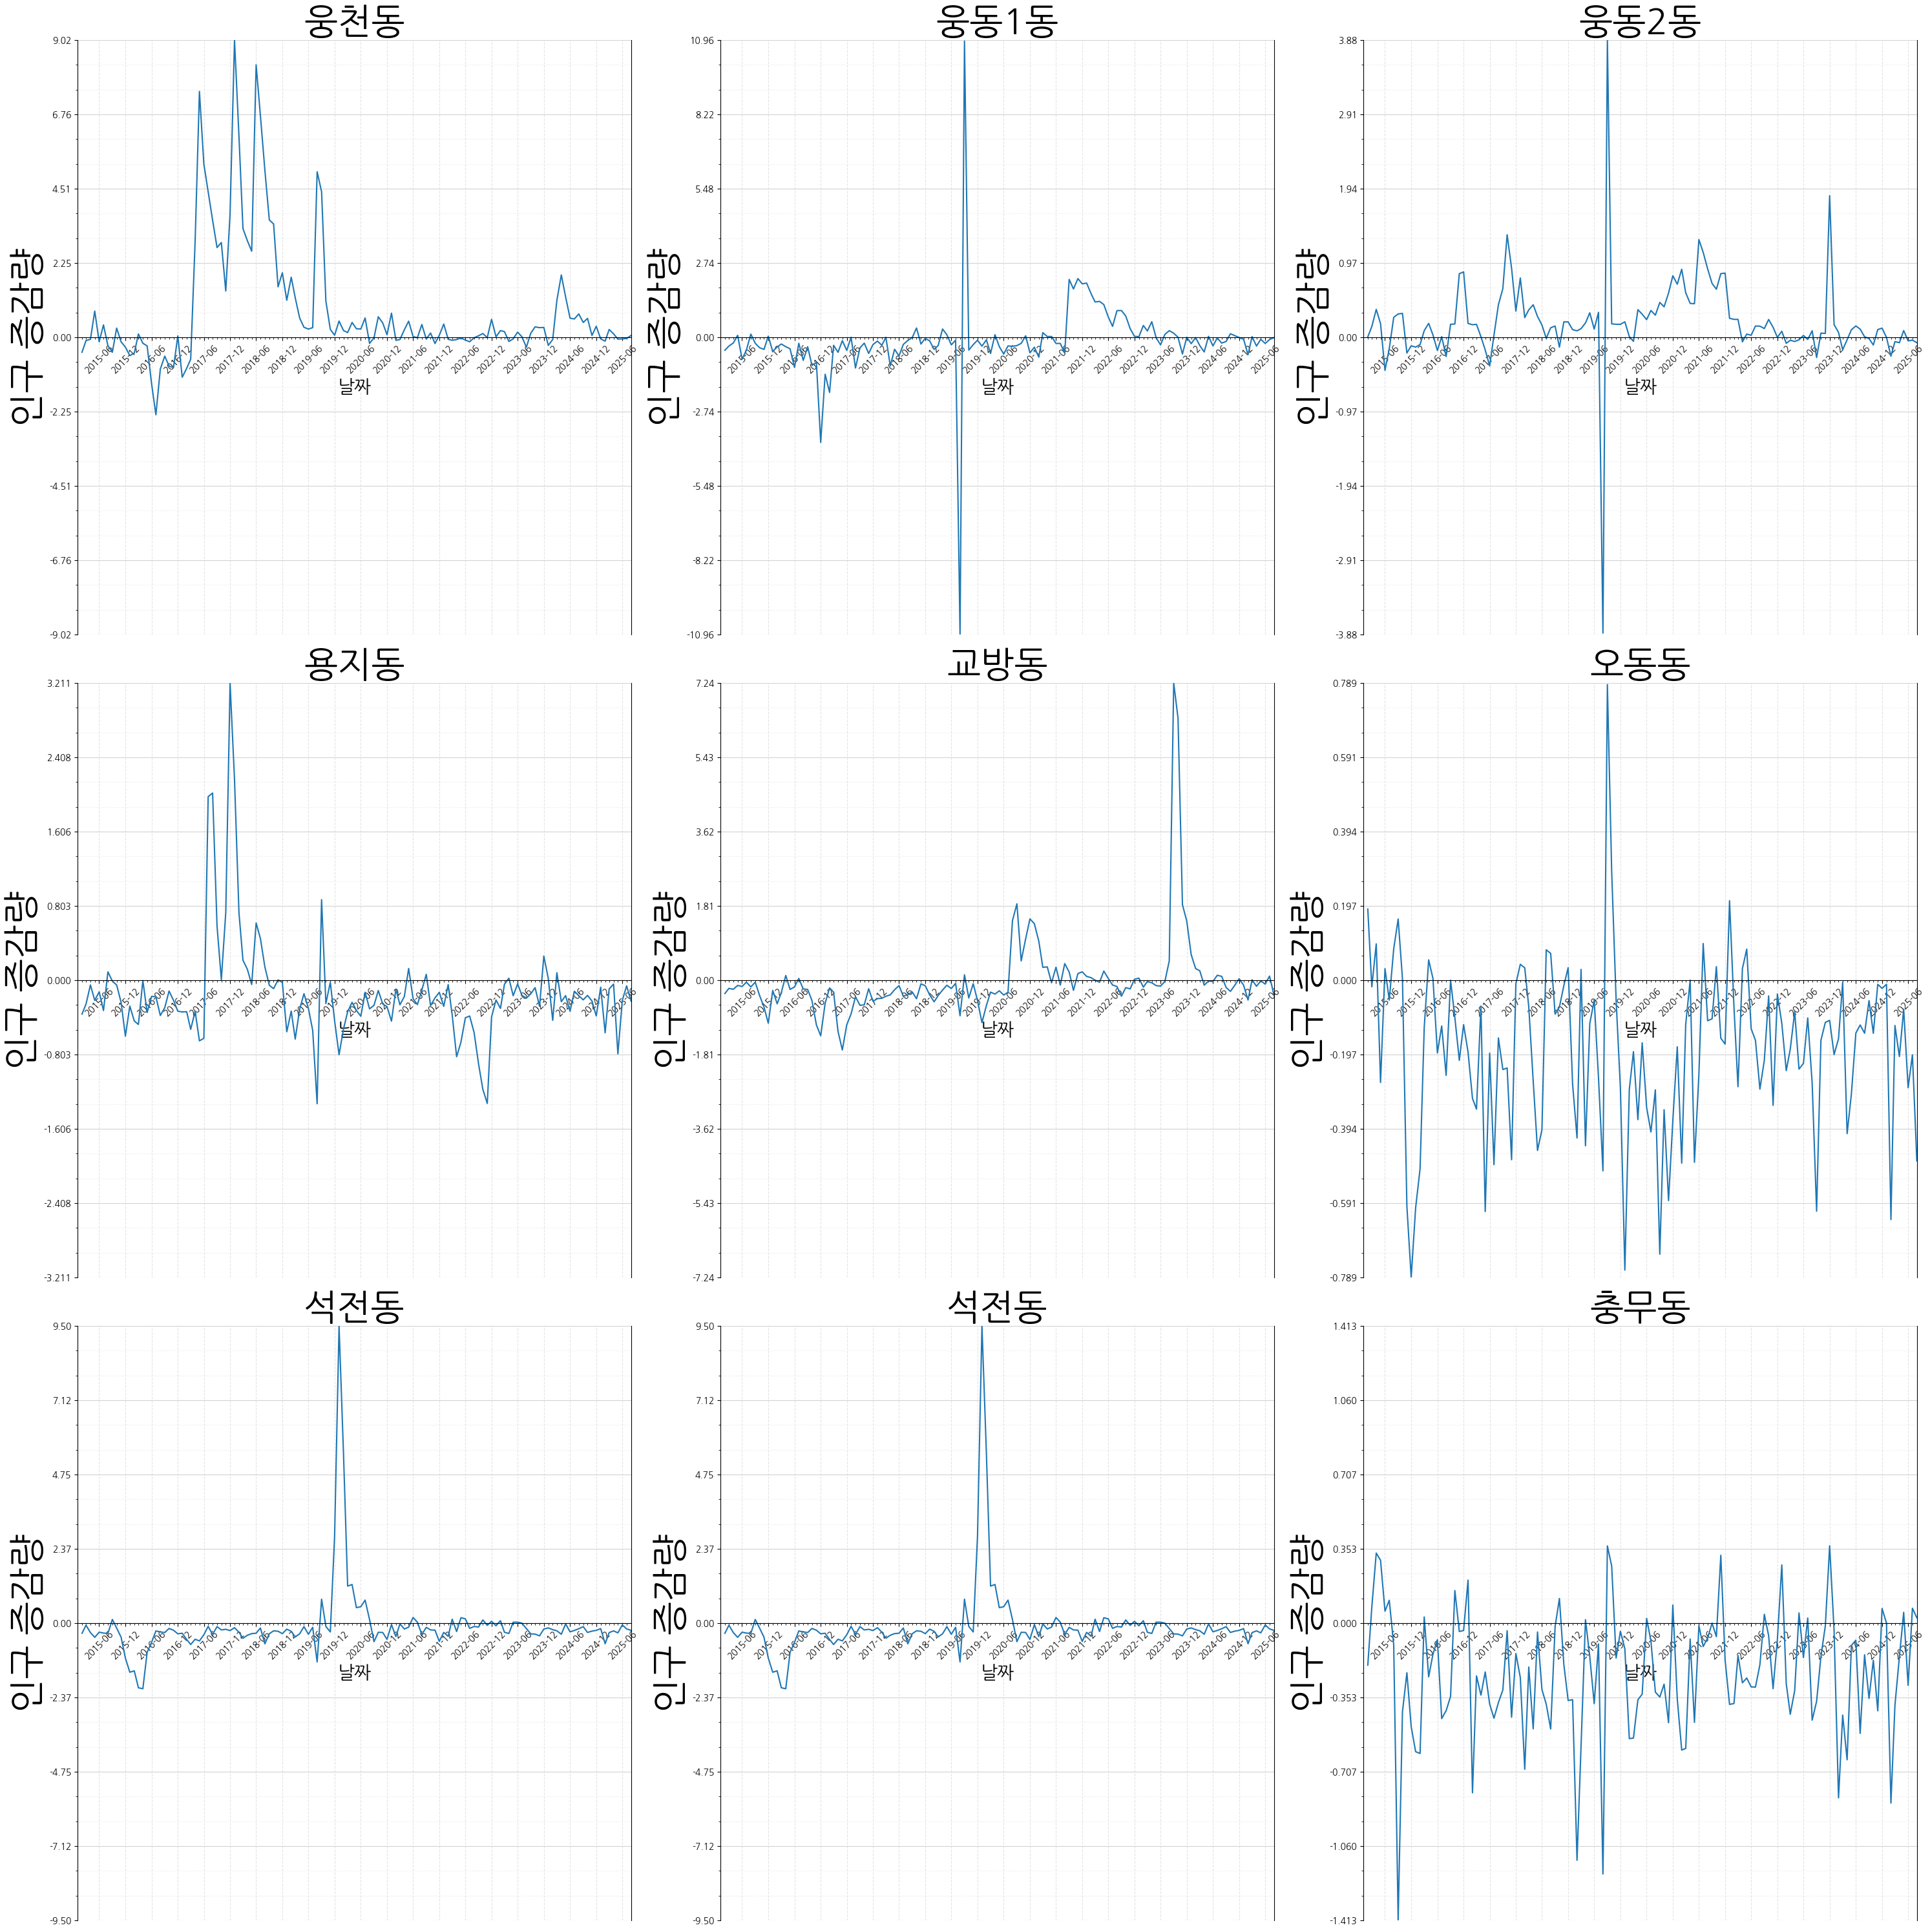

Saved 5.png


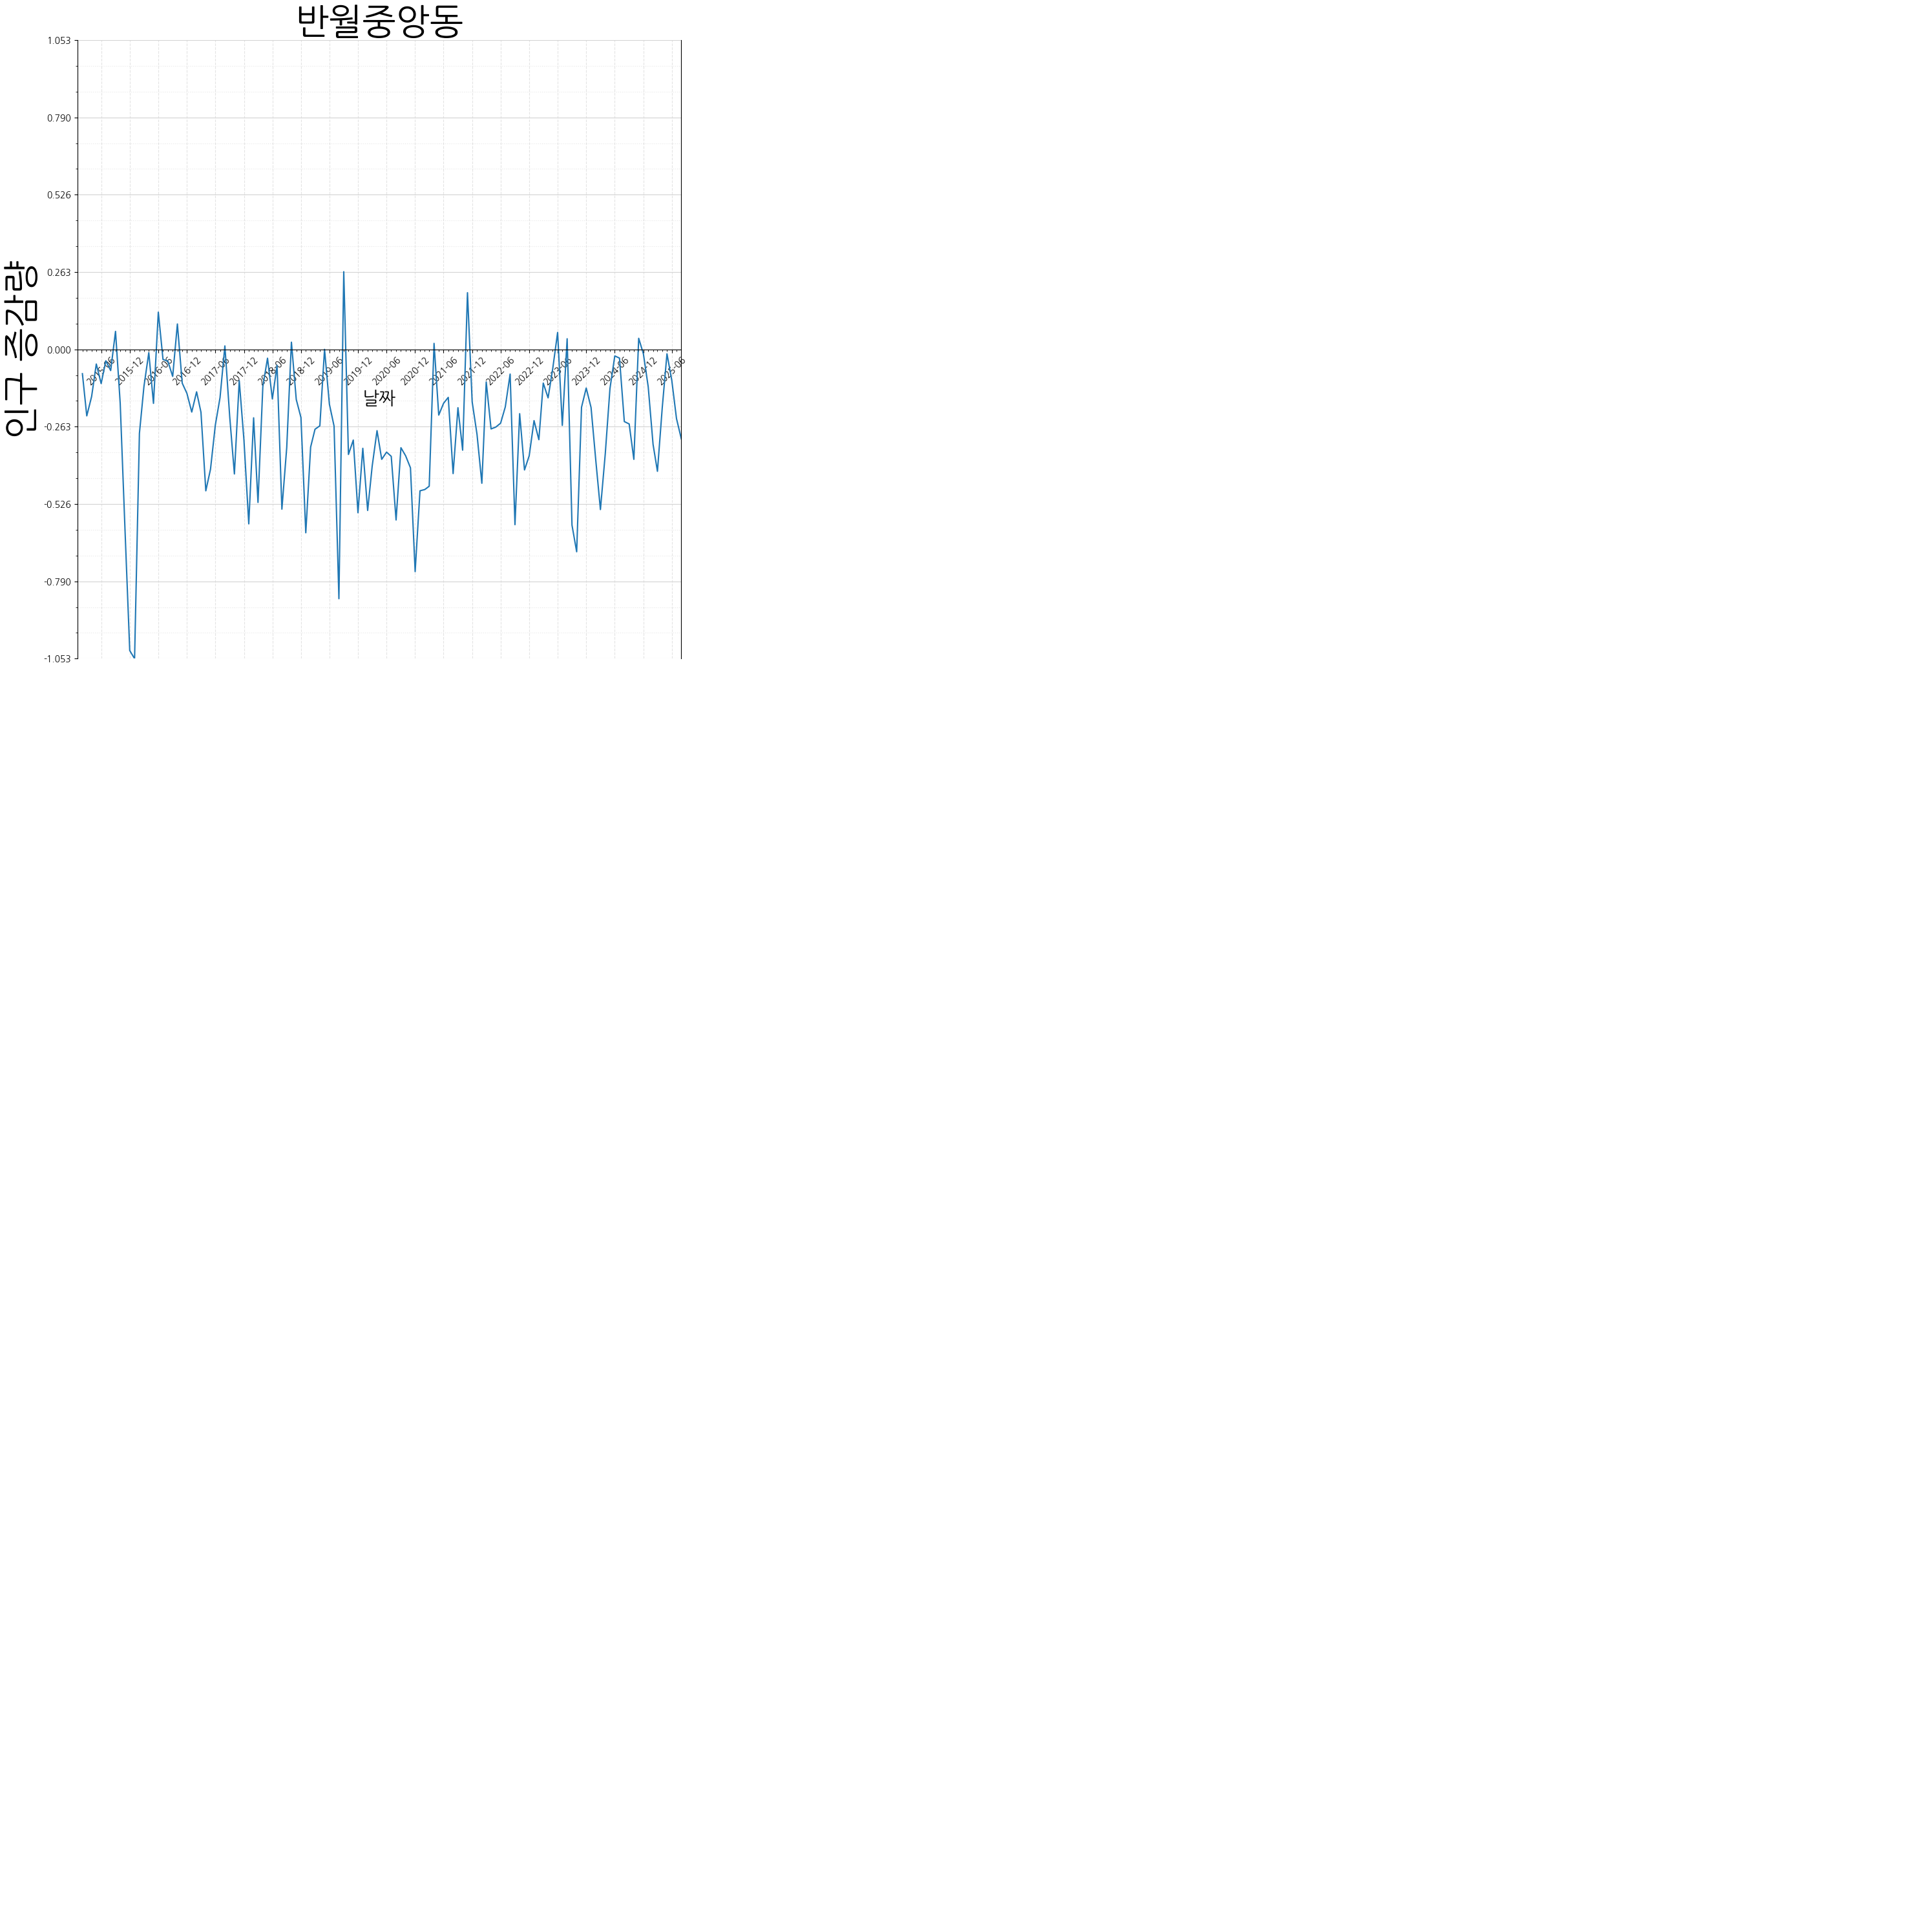

Saved 6.png


In [6]:
# df_list가 데이터프레임의 평탄한 리스트인지, 아니면 리스트-오브-리스트인지 모두 처리하는 코드입니다.
import itertools
x_min_dt = pd.Timestamp('2015-01-01')
x_max_dt = pd.Timestamp('2025-08-01')
TICK_INTERVAL_MONTHS = 6  # 월 단위 동일 간격

def flatten(lst):
    for item in lst:
        if isinstance(item, list):
            yield from flatten(item)
        else:
            yield item

def chunked(iterable, n):
    it = iter(iterable)
    while True:
        batch = list(itertools.islice(it, n))
        if not batch:
            break
        yield batch

# df_population_list를 평탄화
flat_list = list(flatten(df_population_list))
flattened = [df if isinstance(df, pd.DataFrame) else None for df in flat_list]

ncols = 3
nrows = 3
n_plots_per_page = ncols * nrows
count = 0

for chunk in chunked(flattened, n_plots_per_page):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 30))
    axes = axes.flatten()

    for idx, df in enumerate(chunk):
        ax = axes[idx]

        if df is None or (hasattr(df, "empty") and df.empty):
            ax.set_axis_off()
            continue

        # choose plotting column robustly
        plot_col = None
        for candidate in ['소계_변화율', 'delta', '소계']:
            if candidate in df.columns:
                plot_col = candidate
                break
        if plot_col is None:
            ax.set_axis_off()
            continue

        series = df[plot_col].dropna()
        if series.empty:
            ax.set_axis_off()
            continue

        max_abs = max(abs(series.min()), abs(series.max()))
        y_min, y_max = -max_abs, max_abs

        df_plot = df.copy()
        df_plot['date'] = pd.to_datetime(df_plot['year'].astype(str), format='%Y%m', errors='coerce')

        sns.lineplot(data=df_plot, x='date', y=plot_col, ax=ax)
        ax.set_title(f"{df['행정동'].values[0]}", fontsize=40)
        ax.set_xlabel("날짜", fontsize=20)
        ax.set_ylabel("인구 증감량", fontsize=40)
        ax.set_xlim(x_min_dt, x_max_dt)
        ax.set_ylim(y_min, y_max)

        # x축: 월 단위 동일 간격 및 포맷
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=TICK_INTERVAL_MONTHS))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_minor_locator(mdates.MonthLocator())
        ax.tick_params(axis='x', labelrotation=45)

        # try to place bottom spine at y=0 if possible
        try:
            ax.spines['bottom'].set_position(('data', 0))
        except Exception:
            pass
        
        ax.spines['top'].set_visible(False)
        ax.tick_params(axis='x', bottom=True, top=False, labelbottom=True, labeltop=False)

        ax.yaxis.set_major_locator(mticker.MultipleLocator(max_abs / 4))
        ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(3))
        ax.grid(which='major', axis='y', linestyle='-', color='lightgray', linewidth=0.8)
        ax.grid(which='minor', axis='y', linestyle=':', color='lightgray', alpha=0.5)

        # x축 그리드
        ax.grid(which='major', axis='x', linestyle='--', color='lightgray', alpha=0.6)

        for ax in axes[len(chunk):]:
            ax.set_axis_off()

    plt.tight_layout()
    plt.show()
    # figure 저장
    fig.savefig(f"{count}.png", dpi=300)
    print(f"Saved {count}.png")
    count += 1